The k-means algorithm is one of the most popular clustering algorithms. This algorithm is used to divide the input data into k subgroups using various attributes of the data. Grouping is achieved using an optimization technique where we try to minimize the sum of squares of distances between the datapoints and the corresponding centroid of the cluster. 

<p style="color:blue;">K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid </p>

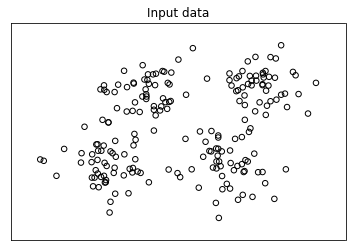

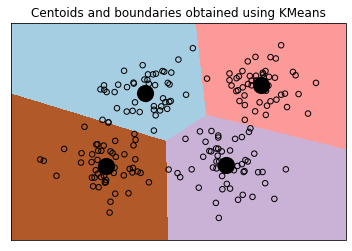

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

input_file = ('./datasets/data_multivar.txt')
# Load data
x = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.split(',')]
        x.append(data)

data = np.array(x)
#data = utilities.load_data('data_multivar.txt')
num_clusters = 4

# Plot data
plt.figure()
plt.scatter(data[:,0], data[:,1], marker='o', 
        facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Train the model
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

# Step size of the mesh
step_size = 0.01

# Plot the boundaries
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict labels for all points in the mesh
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Plot the results
predicted_labels = predicted_labels.reshape(x_values.shape)
plt.figure()
plt.clf()
plt.imshow(predicted_labels, interpolation='nearest',
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(data[:,0], data[:,1], marker='o', 
        facecolors='none', edgecolors='k', s=30)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3,
        color='k', zorder=10, facecolors='black')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

The algorithm follows an iterative procedure, as follows:

- Choose the number of k clusters
- Initially, create k partitions and assign each entry partition either randomly, or by using some heuristic information
- Calculate the centroid of each group
- Calculate the distance between each observation and each cluster centroid
- Then, construct a new partition by associating each entry point with the cluster whose centroid is closer to it
- The centroid for new clusters is recalculated
- Repeat steps 4 to 6 until the algorithm converges